# Using  Sentinel-2 images to monitor mouth of the river Syr Darya and Aral Lake and analyzing it with NDWI index on Creodias

In this notebook, we will present a simple example on how you can easily access data from Creodias using RESTO API and what you can do with it. As an example, we will try to access Sentinel-2 images containining data of Syr Darya river and Aral Lake in Kazakhstan, from May to July 2023. With usage of few Python packages, you will be able to obtain images with Normalized difference Water Index (NDWI).

Raster images containing the NDWI indicator can be used in various fields, including:
* `Water Resource Monitoring`: Tracking changes in water levels in lakes, rivers, and reservoirs, especially important in areas affected by drought or excessive rainfall.

* `Crisis Management`: Rapid identification of flooded areas during floods and assessment of damages.
* `Environmental Protection`: Monitoring wetlands and other aquatic ecosystems to preserve their biodiversity.
* `Urban Planning`: Analyzing the impact of urban development on nearby water resources.
* `Agriculture`: Assessing irrigation of agricultural fields and monitoring plant health.

In this use we will focus on monitoring quantity of water in the area of Syr Darya river's mouth.

# 1. Prerequired

## 1.1 Creodias account

Firstly, to work with Creodias's API we will need an account. More about registration, you can read here: https://creodias.eu/

## 1.2 Python's packages
To connect with RESTP, we will use only one package - `requests`. It's handy tool, that can send GET/POST requests to HTTP servers and handle responses.

This package is not native to Python, and so we will need to download and install it. If it's already installed in your Python, you should be able to successfuly run below cell.

The simplest way to install this package is by using `pip`. After installing pip you will need to write this command - `pip install requests`, and package will be installed in your environment. If you don't have experience with Python's virtual environments, it is adviced to read more here: https://docs.python.org/3/library/venv.html

Another option to get requests package is to use `conda` environment. More about installation and usage of conda's virtual environments you can find here: https://conda.io/projects/conda/en/latest/user-guide/install/index.html

In [19]:
import requests

## 1.3 Prerequired data
Before requesting some data from Creodias, let's specify what data we want to obtain. We will define 3 variables:
* Start date and end date,
* Geometry of interesting us area

`Start date and end date` will define our timerange in reuqest. RESTO will search only for products that were obtained between those two dates.

`Geometry` wll define our area of interest. It will be passed as BBOX (Bounding Box), as a list of coordinates - Xmin, Ymin, Xmax, Ymax. All coordinates will be defined in EPSG:4326.

In [48]:
# Timerange of data that we want to recieve
start_date = '2023-05-01'
end_date = '2023-07-31'
# Geometry in form of a BBOX
bbox = [10.678711, 50.035974,12.788086, 51.234407]

# 2. Work with RESTO API

RESTO API is one of the API created to communicate with Creodias - vast repository of Earth Observation data. RESTO is an API build upon RESTful API and allows users to request data based on spatial and temporal parameters. Big advantage of RESTO is its connection with other Creodias solutions. Virtual Machines build upon Creodias have mounted catalog containing all of Creodias EO data. On the other hand, in RESTO API's response you can find paths to products on mounted catalog. As you will see, it's very convenient way of accessing data.

# 2.1 API URL

We will use this predefined template for requesting data. As you can see, some parameters are defined as veriables, which we will be able to edit. Additionaly, we will search only for images with cloud coverage lower than 20%.

In [78]:
API_URL = "https://datahub.code-de.org/resto/api/collections/Sentinel5P/search.json?\
box={minx},{miny},{maxx},{maxy}\
&startDate={start_date}\
&completionDate={end_date}\
&sortParam=startDate\
&sortOrder=ascending\
&platform=S5P\
"

# 2.2 Creating request from template
Now that we have request template and parameters, we can combine them to one.

In [80]:
specified_url = API_URL.format(minx=bbox[0], miny=bbox[1], maxx=bbox[2], maxy=bbox[3], start_date=start_date, end_date=end_date)
print(specified_url)

https://datahub.code-de.org/resto/api/collections/Sentinel5P/search.json?box=10.678711,50.035974,12.788086,51.234407&startDate=2023-05-01&completionDate=2023-07-31&sortParam=startDate&sortOrder=ascending&platform=S5P


After defining our own request, let's send it to API.

In [81]:
response = requests.get(specified_url).json()

Below you can see output for the first found product.

In [82]:
response

{'type': 'FeatureCollection',
 'properties': {'id': '2cce2fc1-338d-586d-b84d-c41a2c19a636',
  'totalResults': None,
  'exactCount': 0,
  'startIndex': 1,
  'itemsPerPage': 20,
  'query': {'originalFilters': {'box': '10.678711,50.035974,12.788086,51.234407',
    'startDate': '2023-05-01',
    'completionDate': '2023-07-31',
    'platform': 'S5P',
    'collection': 'SENTINEL-5P'},
   'appliedFilters': {'box': '10.678711,50.035974,12.788086,51.234407',
    'startDate': '2023-05-01',
    'completionDate': '2023-07-31',
    'platform': 'S5P',
    'collection': 'SENTINEL-5P'},
   'processingTime': 5.496683513},
  'links': [{'rel': 'self',
    'type': 'application/json',
    'title': 'self',
    'href': 'https://datahub.code-de.org/resto/api/collections/Sentinel5P/search.json?box=10.678711,50.035974,12.788086,51.234407&startDate=2023-05-01&completionDate=2023-07-31&sortParam=startDate&sortOrder=ascending&platform=S5P'},
   {'rel': 'search',
    'type': 'application/opensearchdescription+xml',

In [95]:
dataset = [x['properties']['productIdentifier'] for x in response['features']]

Here you can see paths for your products

In [97]:
dataset

['/codede/Sentinel-5P/TROPOMI/L1B/2023/05/01/S5P_OFFL_L1B_RA_BD8_20230501T093430_20230501T111601_28744_03_020100_20230501T130358',
 '/codede/Sentinel-5P/TROPOMI/L2__O3____/2023/05/01/S5P_OFFL_L2__O3_____20230501T093430_20230501T111601_28744_03_020401_20230503T014823',
 '/codede/Sentinel-5P/TROPOMI/L2__CO____/2023/05/01/S5P_OFFL_L2__CO_____20230501T093430_20230501T111601_28744_03_020500_20230502T232407',
 '/codede/Sentinel-5P/TROPOMI/L2__NP_BD6/2023/05/01/S5P_OFFL_L2__NP_BD6_20230501T093430_20230501T111601_28744_03_010300_20230502T232407',
 '/codede/Sentinel-5P/TROPOMI/L2__AER_AI/2023/05/01/S5P_OFFL_L2__AER_AI_20230501T093430_20230501T111601_28744_03_020500_20230502T232409',
 '/codede/Sentinel-5P/TROPOMI/L1B/2023/05/01/S5P_OFFL_L1B_RA_BD3_20230501T093430_20230501T111601_28744_03_020100_20230501T130358',
 '/codede/Sentinel-5P/TROPOMI/L1B/2023/05/01/S5P_OFFL_L1B_RA_BD6_20230501T093430_20230501T111601_28744_03_020100_20230501T130358',
 '/codede/Sentinel-5P/TROPOMI/L1B/2023/05/01/S5P_OFFL_L

# 3. Simple data computing - obtaining NDWI

In this chapter we will conduct simple data computing. As stated before, this notebook concentrate on monitoring Syr Darya river's mouth, so we will try to calculate NDWI index for each pixel and create raster from it. Using all founded items, we will be able to monitor lake status from entire month.

## 3.1 Libraries

In this chapter we will try to compute obtained by us imagery data, with usage of Python and its spatial-oriented packages. 

`rasterio` will allow us to read raster data and to visualize created NDWI images.

`osgeo` is GDAL API for Python.

`numpy` is popular Python's package allowing complex math equations and formats, such as matrixes.

`os` package serves as connection between Python and our Operation System.

Packages used here may be complicated to install for some people and we advise to use conda environment (especially `osgeo`). Conda environment is an open-source package and environment manager, that also shares many geospatial oriented packages. When using python in geospatial computing, conda becomes a close friend of every data scientist.

In [85]:
import rasterio
from osgeo import gdal, gdal_array, osr
import numpy as np
import os

## 3.2 Functions for reading, calculating and saving raster data
Here we present you some functions for reading raster data into Numpy matrix, calculating NDWI with NIR and GREEN matrixes and saving result as a new raster. We will conduct such calculation for each downloaded item. In the end, we will obtain NDWI data on Syr Darya river and Aral Lake from 3 months.

In [106]:
def getFullPath(dir: str, resolution: int, band: str):
    if not os.path.isdir(dir):
        raise ValueError(f"Provided path does not exist: {dir}")
    elif resolution not in [10,20,60]:
        raise ValueError(f"Provided resolution does not exist: R{resolution}m")
    else:
        full_path = dir
        while True:
            content = os.listdir(full_path)
            if len(content) == 0:
                raise ValueError(f"Directory empty: {full_path}")
            elif len(content) == 1:
                if full_path[-1] != '/':
                    full_path = full_path + '/' + content[0]
                else:
                    full_path = full_path + content[0]
            else:
                if 'GRANULE' in content:
                    full_path = full_path + '/' + 'GRANULE'
                    break
                else:
                    raise ValueError(f"Unsupported dir architecture: {full_path}")
        full_path = full_path + '/' + os.listdir(full_path)[0]
        full_path = full_path + '/' + "IMG_DATA"
        if len(os.listdir(full_path)) == 3:
            full_path = full_path + '/' + f'R{resolution}m'
            images = os.listdir(full_path)
            for img in images:
                if band in img:
                    return full_path + '/' + img
            raise ValueError(f'No such band {band} in directory: {full_path}')
        else:
            images = os.listdir(full_path)
            for img in images:
                if band in img:
                    return full_path + '/' + img
            raise ValueError(f'No such band {band} in directory: {full_path}')

# Get transformation matrix from raster
def getTransform(pathToRaster):
    dataset = gdal.Open(pathToRaster)
    transformation = dataset.GetGeoTransform()
    return transformation

# Read raster and return pixels' values matrix as int16, new transformation matrix, crs
def readRaster(path, resolution, band):
    path = getFullPath(path, resolution, band)
    trans = getTransform(path) # trzeba zdefiniować który kanał
    raster, crs = rasterToMatrix(path)
    return raster.astype(np.int16), crs, trans

def rasterToMatrix(pathToRaster):
    with rasterio.open(pathToRaster) as src:
        matrix = src.read(1)
    return matrix, src.crs.to_epsg()

# Transform numpy's matrix to geotiff; pass new raster's filepath, matrix with pixels' values, gdal file type, transformation matrix, projection, nodata value
def npMatrixToGeotiff(filepath, matrix, gdalType, projection, transformMatrix, nodata = None):
    driver = gdal.GetDriverByName('Gtiff')
    if len(matrix.shape) > 2:
        (bandNr, yRes, xRes) = matrix.shape
        image = driver.Create(filepath, xRes, yRes, bandNr, gdalType)
        for b in range(bandNr):
            b = b + 1
            band = image.GetRasterBand(b)
            if nodata is not None:
                band.SetNoDataValue(nodata)
            band.WriteArray(matrix[b-1,:,:])
            band.FlushCache
    else:
        bandNr = 1
        (yRes, xRes) = matrix.shape
        image = driver.Create(filepath, xRes, yRes, bandNr, gdalType)
        print(type(image))
        band = image.GetRasterBand(bandNr)
        if nodata is not None:
            band.SetNoDataValue(nodata)
        band.WriteArray(matrix)
        band.FlushCache
    image.SetGeoTransform(transformMatrix)
    image.SetProjection(projection)
    del driver, image, band

## 3.3 Computing

With usage of defined functions, we will now generate NWDI rasters. Only data that will be needed in this step is a list with paths to our products (extracted from zip archive). Function `readRaster` will choose specified band from specified path.

In [ ]:
for item in dataset:
    try:
        test_raster = readRaster(item, 10, "BD8")
    except Exception as e:
        print (e)

[Errno 20] Not a directory: '/codede/Sentinel-5P/TROPOMI/L1B/2023/05/01/S5P_OFFL_L1B_RA_BD8_20230501T093430_20230501T111601_28744_03_020100_20230501T130358/S5P_OFFL_L1B_RA_BD8_20230501T093430_20230501T111601_28744_03_020100_20230501T130358.cdl'
[Errno 20] Not a directory: '/codede/Sentinel-5P/TROPOMI/L2__O3____/2023/05/01/S5P_OFFL_L2__O3_____20230501T093430_20230501T111601_28744_03_020401_20230503T014823/S5P_OFFL_L2__O3_____20230501T093430_20230501T111601_28744_03_020401_20230503T014823.cdl'
[Errno 20] Not a directory: '/codede/Sentinel-5P/TROPOMI/L2__CO____/2023/05/01/S5P_OFFL_L2__CO_____20230501T093430_20230501T111601_28744_03_020500_20230502T232407/S5P_OFFL_L2__CO_____20230501T093430_20230501T111601_28744_03_020500_20230502T232407.cdl'
[Errno 20] Not a directory: '/codede/Sentinel-5P/TROPOMI/L2__NP_BD6/2023/05/01/S5P_OFFL_L2__NP_BD6_20230501T093430_20230501T111601_28744_03_010300_20230502T232407/S5P_OFFL_L2__NP_BD6_20230501T093430_20230501T111601_28744_03_010300_20230502T232407.cdl'

In [103]:


test_raster = readRaster("/codede/Sentinel-5P/TROPOMI/L1B/2023/05/01/S5P_OFFL_L1B_RA_BD8_20230501T093430_20230501T111601_28744_03_020100_20230501T130358/", 10, "BD8")


ValueError: Unsupported dir architecture: /codede/Sentinel-5P/TROPOMI/L1B/2023/05/01/S5P_OFFL_L1B_RA_BD8_20230501T093430_20230501T111601_28744_03_020100_20230501T130358/

In [13]:
# Path to catalog for processed images with NDWI index
compution_output = '/home/eouser/copernicus_hackathon_2025/output'

# Iterating over single product
for item in dataset:
    # Reading name from path
    name = item.split('/')[-1]
    # Reading green band into matrix
    green = readRaster(item, 10, 'B03')
    # Reading NIR band into matrix
    nir = readRaster(item, 10, 'B08')
    # Calculating NDWI matrix
    ndwi = (green[0]-nir[0]) / (green[0]+nir[0])
    # Creating SpatialReference object and setting it to match original's raster CRS
    projection = osr.SpatialReference()
    projection.ImportFromEPSG(green[1])
    # Creating raster from matrix in GeoTiff format
    npMatrixToGeotiff(f'{compution_output}/{name}.tif', ndwi, gdal_array.NumericTypeCodeToGDALTypeCode(np.float32), projection.ExportToWkt(), green[2])

/tmp/ipykernel_667111/2690134372.py:13: RuntimeWarning: invalid value encountered in divide
  ndwi = (green[0]-nir[0]) / (green[0]+nir[0])


<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>
<class 'osgeo.gdal.Dataset'>


After successfuly creating and saving new images, we can now visualize them in Python using raterio package.

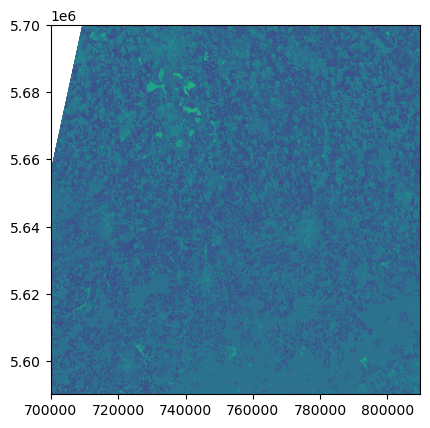

<Axes: >

In [17]:
file = "S2A_MSIL1C_20230503T101021_N0509_R022_T32UQB_20230503T153035.SAFE.tif"
output_path = "/home/eouser/copernicus_hackathon_2025/output/"

os.listdir(output_path)

path = os.path.join(output_path, file)
img = rasterio.open(path)
from rasterio.plot import show
show(img)

# 4 Conclusion

Now that we obtained our images, let see what we can learn from them. Here are 3 images, each from different month.

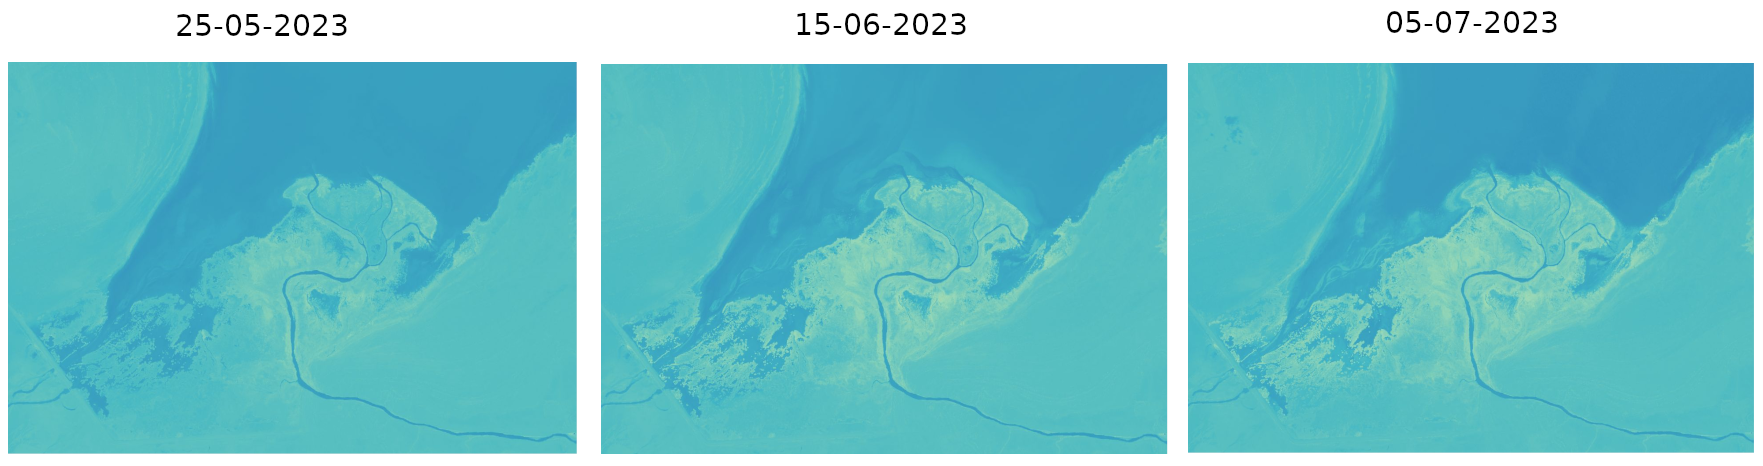

As you can see, mouth of the river starts to be more and more yellow with each month. In this style dark blue means high probability of water occurrence, while yellow means no water at all. So, what we can see here, is that there barely any water near mouth of Syr Darya river. We can assume, that during summer rivers loses lot of water. This can be happening becouse of high temperatures, but also from human doing. Lot of people uses more river's water during summer to irrigate their fields. Unfortunalty, in the end, it means that Aral Lake will still be dying and it is not impossible for us, to see its end. The end of once the biggest lake on our planet.